**Name: Saran Adhikari**

**University ID: 2329794**

**Worksheet3**

# Implementation of MCP Neuron for AND and OR Function.

In [1]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements basic AND operations with MCP Neuron for two inputs.
    Arguments:
        Inputs:
            X1 (1D array): An array of binary values.
            X2 (1D array): An array of binary values.
        Output:
            state_neuron (1D list): An state of neuron 1 or 0 for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element-wise addition of two input arrays stored in a new array (list):
    sums = [x1 + x2 for x1, x2 in zip(X1, X2)]
    # Create a new array to put all the predictions, let's name that state_neuron:
    state_neuron = []
    # Append 1 in state_neuron if sum (element) of above list is above or equal to Threshold, else append 0:
    for s in sums:
        if s >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

In [2]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [3]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    # Perform an element-wise addition of two input arrays stored in a new array (list):
    sums = [x1 + x2 for x1, x2 in zip(X1, X2)]
    # Create a new array to put all the predictions, let's name that a state_neuron:
    state_neuron = []
    # Append 1 in state_neuron if sum (element) of above list is above or equal to Threshold, else append 0:
    for s in sums:
        if s >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


In [4]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


# Implementation for 0 Vs. 1 Classification.

In [5]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1: Load the Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
try:
    df_0_1 = pd.read_csv("/content/drive/MyDrive/AI&ML/WEEK3/mnist_0_and_1.csv")  # Adjust path if necessary
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")
    raise

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)
print("Unique labels in y:", np.unique(y))


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)
Unique labels in y: [0 1]


1. What does the shape of X represent?

**Answer:** The dimensions of X (e.g., (11982, 784)) indicate the total number of instances (rows, e.g., 11,982 images) and the count of attributes (columns, e.g., 784 pixels per image).


### Step 2: Viewing the Dataset.

Number of images labeled 0: 5923
Number of images labeled 1: 6742
Axes shape: (2, 5)


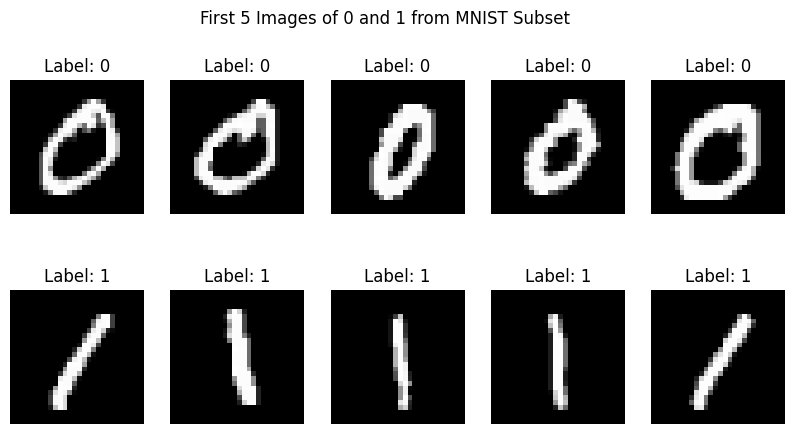

In [7]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

# Check the number of images available
print("Number of images labeled 0:", len(images_0))
print("Number of images labeled 1:", len(images_1))

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Verify axes is a 2D array
print("Axes shape:", axes.shape)  # Should be (2, 5)

# Check if there are enough images to plot
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 3 - Initializing the Weights:

In [8]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

3. What does the weights array represent in this context?

**Answer:** The weights array (shape (784,)) signifies the significance of each pixel in classifying an image as a 3 (0) or 5 (1). Each value represents a pixel's influence on the decision-making process.

4. Why are we initializing the weights to zero? What effect could this have on the training process

**Answer:** We set the weights to zero for simplicity and impartiality, assuming no initial bias. While this may slow convergence if the optimal weights are significantly different from zero, the Perceptron will update them during training as long as the data is linearly separable.

## Step - 4 - Make a Decision function:

In [9]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all

## Step - 5 - Implement the Perceptron Learning Algorithm

In [10]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    for epoch in range(epochs):
        # Make predictions for all samples using the decision function
        y_pred = decision_function(X, weights, bias)

        # Update weights and bias based on prediction errors
        for i in range(len(y)):
            # Calculate error: difference between true label and predicted label
            error = y[i] - y_pred[i]
            # Update weights: w = w + learning_rate * error * x_i
            weights += learning_rate * error * X[i]
            # Update bias: b = b + learning_rate * error
            bias += learning_rate * error

        # Calculate accuracy for this epoch
        accuracy = np.mean(y_pred == y)
        # Optional: Print accuracy every 10 epochs for monitoring
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}: Accuracy = {accuracy:.4f}")

    # Return the updated weights, bias, and final accuracy
    return weights, bias, accuracy

5. What is the purpose of the output = np.dot(X[i], weights) + bias line?

**Answer:** This line calculates the weighted sum of the input features (X[i]) and weights, adding the bias, to obtain the raw score before applying the step function for classification.

6. What happens when the prediction is wrong? How are the weights and bias updated?

**Answer:** When the prediction is wrong, error = y[i] - y_pred[i] is non-zero (1 or -1). Weights are updated as weights += learning_rate * error * X[i] and bias as bias += learning_rate * error, shifting the decision boundary toward the correct class.

7. Why is the final accuracy important, and what do you expect it to be?

**Answer:** Final accuracy evaluates the model's effectiveness in distinguishing between 0s and 1s.

## Training the Perceptron

In [11]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 10: Accuracy = 0.9934
Epoch 20: Accuracy = 0.9954
Epoch 30: Accuracy = 0.9963
Epoch 40: Accuracy = 0.9966
Epoch 50: Accuracy = 0.9968
Epoch 60: Accuracy = 0.9970
Epoch 70: Accuracy = 0.9972
Epoch 80: Accuracy = 0.9972
Epoch 90: Accuracy = 0.9972
Epoch 100: Accuracy = 0.9974
The Final Accuracy is:  0.9973943939992104


## Step 6: Visualize Misclassified Images

Final Accuracy: 0.9974


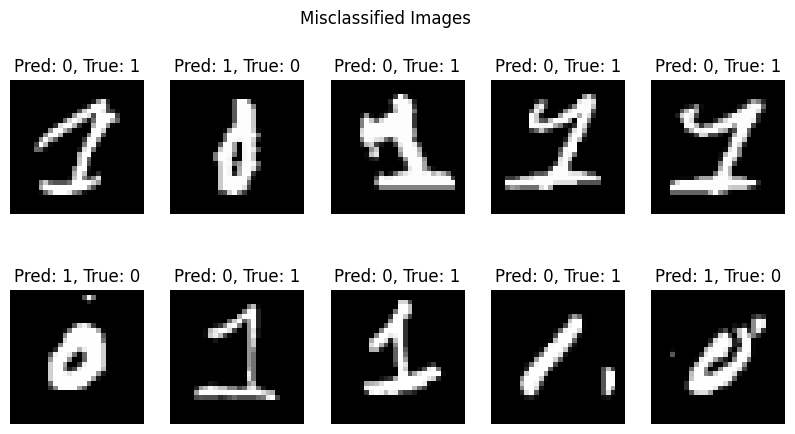

In [12]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

8. What does misclassified_idx store, and how is it used in this code?

**Answer:** Misclassified_idx stores the indices of samples where y_pred != y_binary. It’s used to select and plot up to 10 misclassified images for visual inspection.

9. How do you interpret the result if the output is ”All images were correctly classified!”?

**Answer:** It means the Perceptron perfectly separated 3s and 5s (100% accuracy), suggesting the dataset is linearly separable or small and simple.

## Perceptron Algorithm for 3 vs 5 Classification

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_3_5 = pd.read_csv("/content/drive/MyDrive/AI&ML/WEEK3/mnist_3_and_5.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_3_5.drop(columns=["label"])  # 784 pixels
y = df_3_5["label"].values  # Labels (0 or 1)

# Convert labels to binary: 3 -> 0, 5 -> 1
y_binary = np.where(y == 3, 0, 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)
print("Unique labels in y:", np.unique(y))  # Should show [3, 5]
print("Unique labels in y_binary:", np.unique(y_binary))  # Should show [0, 1]

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)
Unique labels in y: [3 5]
Unique labels in y_binary: [0 1]


## Step - 1 Viewing the Dataset

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)
Unique labels in y: [3 5]
Number of images labeled 3: 1484
Number of images labeled 5: 1257


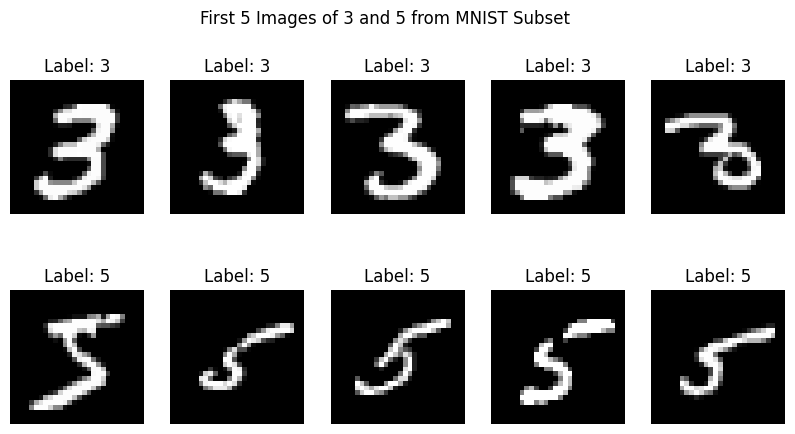

In [14]:

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # 784 pixels
y = df_3_5["label"].values  # Labels (3 or 5)

# Convert labels to binary: 3 -> 0, 5 -> 1
y_binary = np.where(y == 3, 0, 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)
print("Unique labels in y:", np.unique(y))

# Separate images for label 3 and label 5
images_3 = X[y == 3]  # Get all images with label 3
images_5 = X[y == 5]  # Get all images with label 5

# Check the number of images available
print("Number of images labeled 3:", len(images_3))
print("Number of images labeled 5:", len(images_5))

# Create subplots to visualize the first 5 images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_3 or images_5 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 3
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 5
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [15]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [16]:
# Define the decision function
def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)  # Activation function (step function)
    return y_pred_all

## Step - 4 - Implement the Perceptron Learning Algorithm

In [17]:
# Define the training function
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    for epoch in range(epochs):
        y_pred = decision_function(X, weights, bias)
        for i in range(len(y)):
            error = y[i] - y_pred[i]
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
        accuracy = np.mean(y_pred == y)
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}: Accuracy = {accuracy:.4f}")
    return weights, bias, accuracy

## Step - 5 - Training the Perceptron

In [18]:
# Train the model with the perceptron learning algorithm for 3 vs. 5
weights, bias, accuracy = train_perceptron(X, y_binary, weights, bias)

# Evaluate the model
print("The Final Accuracy for 3 vs. 5 is: ", accuracy)

Epoch 10: Accuracy = 0.9175
Epoch 20: Accuracy = 0.9391
Epoch 30: Accuracy = 0.9445
Epoch 40: Accuracy = 0.9482
Epoch 50: Accuracy = 0.9580
Epoch 60: Accuracy = 0.9489
Epoch 70: Accuracy = 0.9445
Epoch 80: Accuracy = 0.9511
Epoch 90: Accuracy = 0.9580
Epoch 100: Accuracy = 0.9595
The Final Accuracy for 3 vs. 5 is:  0.9595038307187158


## Step 6: Visualize Misclassified Images

Final Accuracy: 0.9595


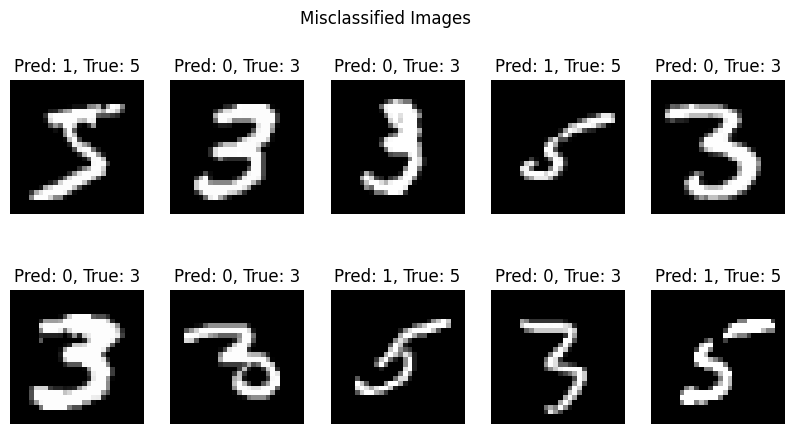

In [19]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")